<a href="https://colab.research.google.com/github/amr-elbana/AI-driven-post-harvest-sorting-system/blob/Ahmed-YOLOv8/YOLO%20Object%20Detection/Yolov8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! nvidia-smi

Wed Dec  4 15:09:04 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 21.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image # Changed 'Imgage' to 'Image'
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 911, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'export', 'benchmark', 'track', 'val', 'train', 'predict'}.

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'segment', 'classify', 'detect', 'obb'}
                MODE (required) is one of {'export', 'benchmark', 'track', 'val', 'train', 'predict'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at ht

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="2yZy70AwsLPMp9TeYH0r")
project = rf.workspace("how-r-u").project("orange_classification-4ryft")
version = project.version(2)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Orange_classification-2 in yolov8:: 100%|██████████| 3649/3649 [00:00<00:00, 6746.76it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/Orange_classification-2/data.yaml epochs=10 imgsz=640


100% 49.7M/49.7M [00:00<00:00, 327MB/s]
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Orange_classification-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

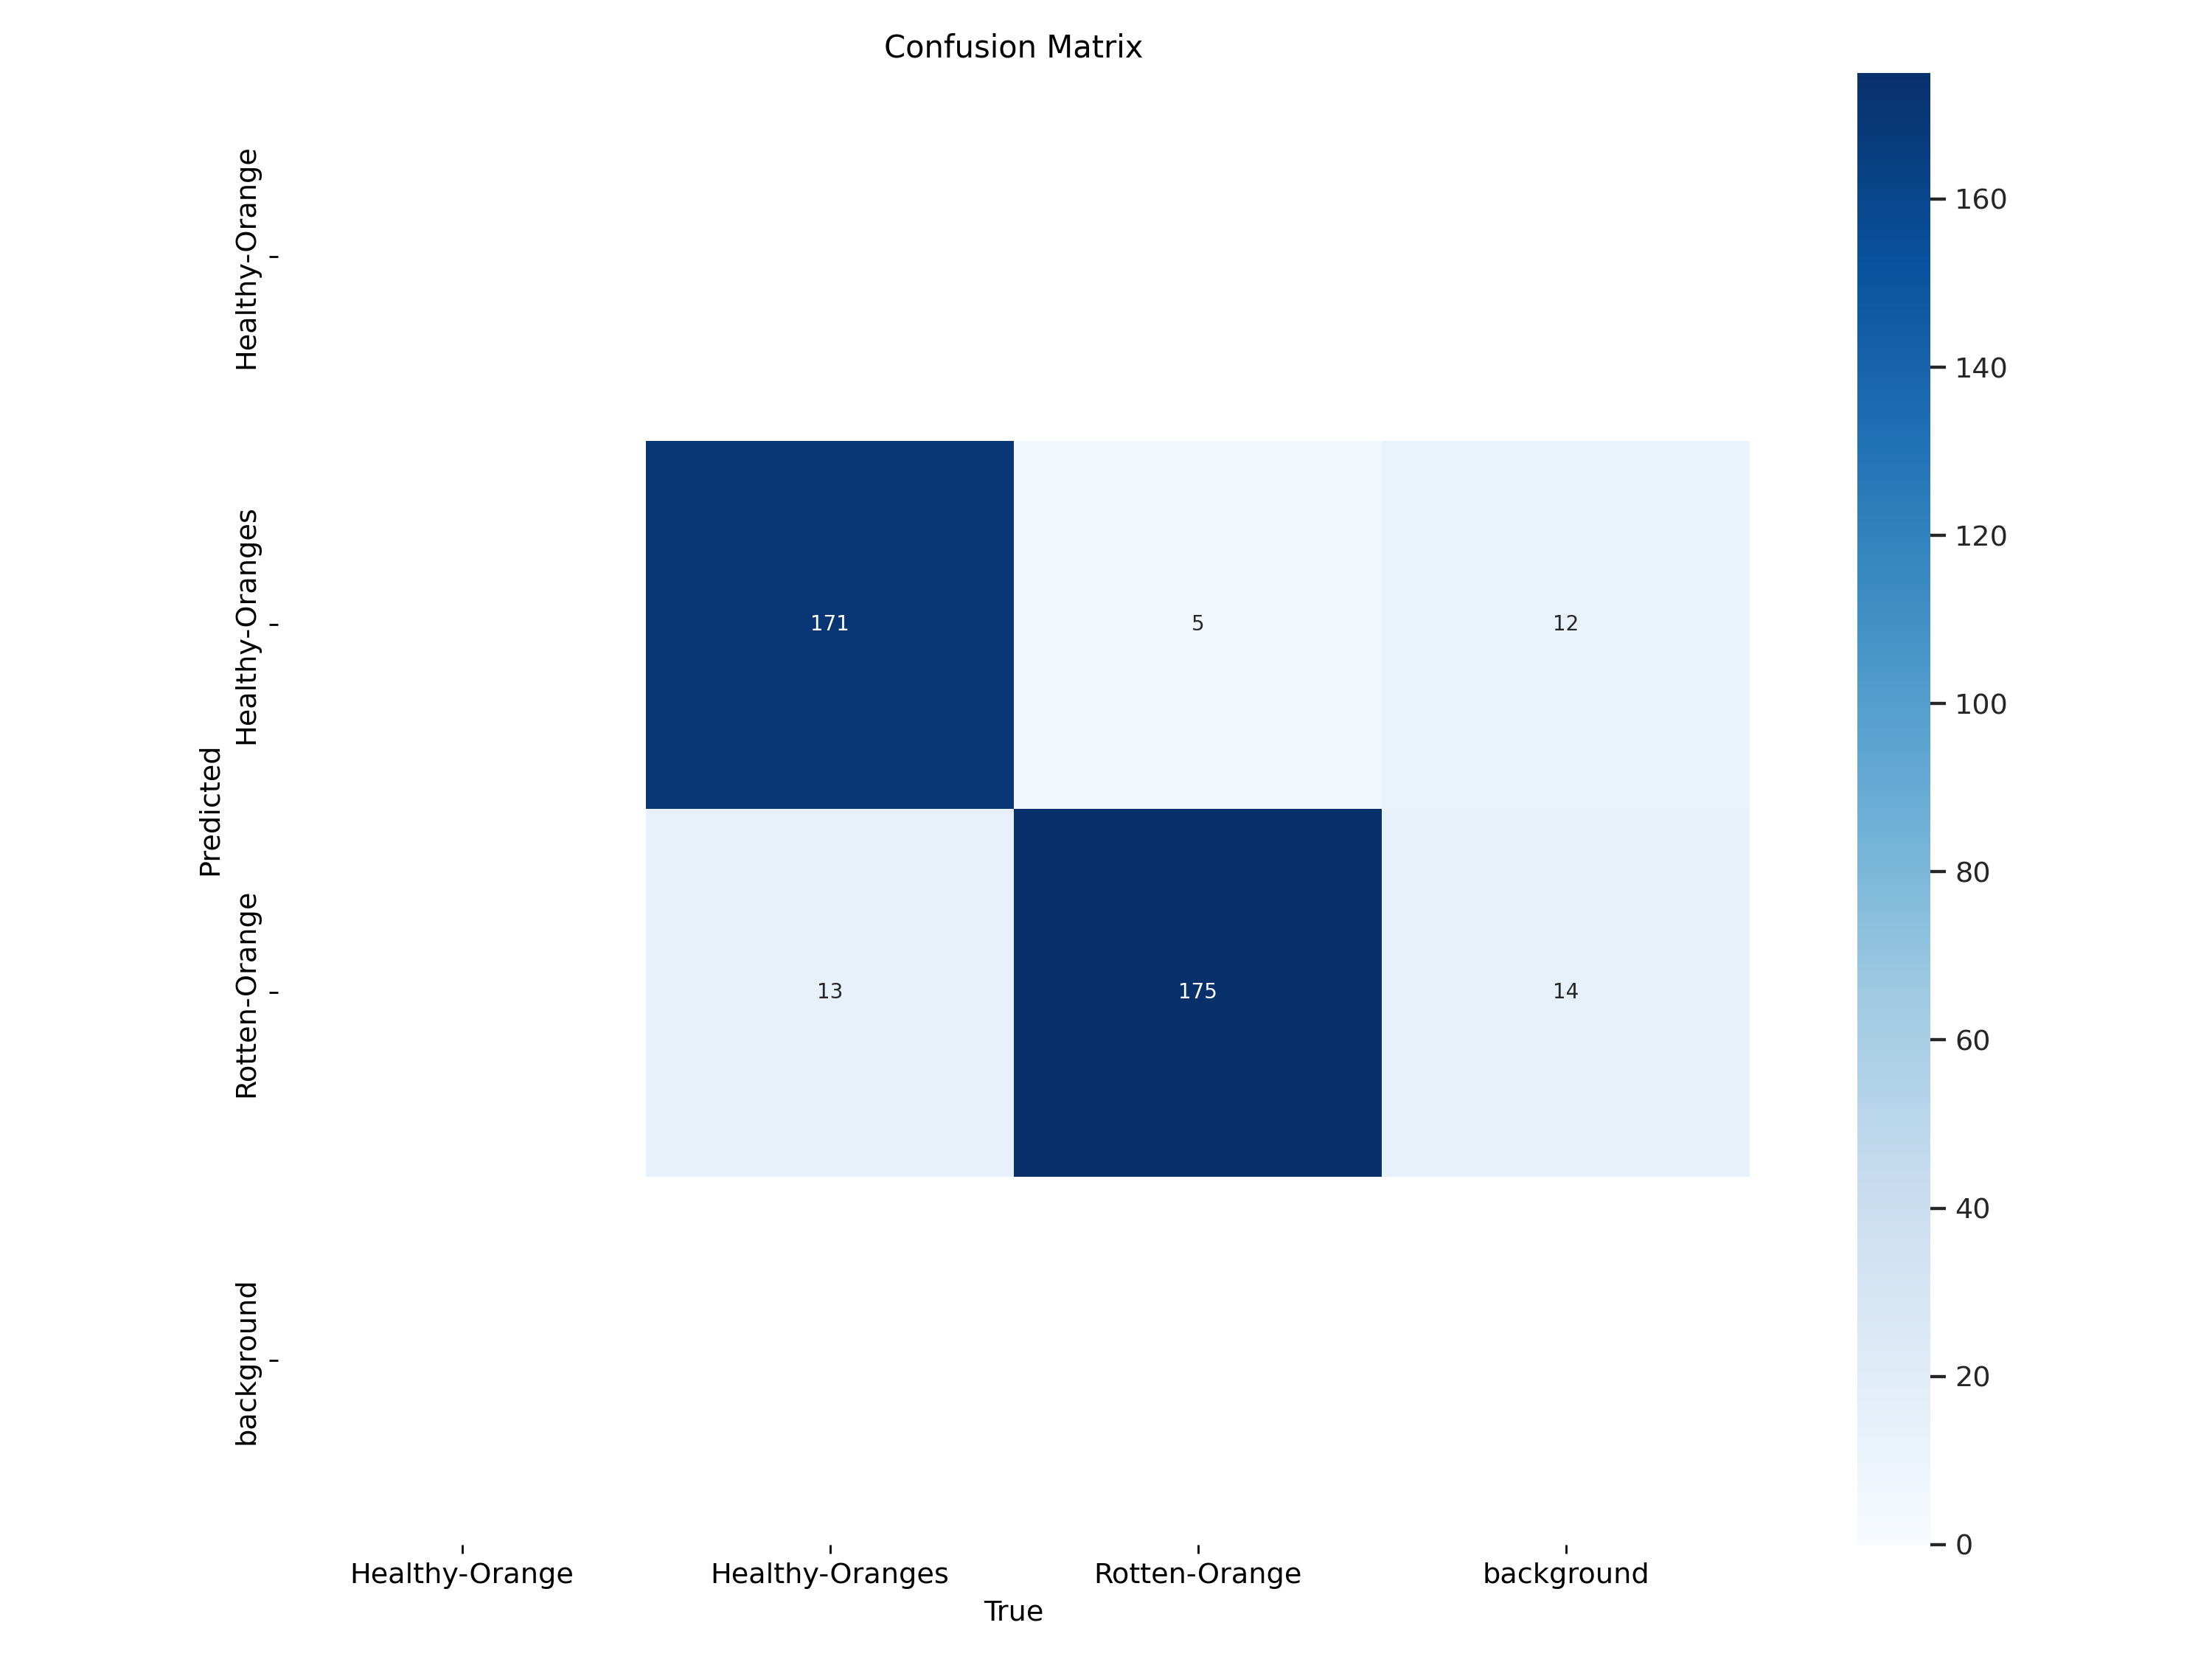

In [ ]:
Image(filename= f'/content/runs/detect/train/confusion_matrix.png' , width=600)

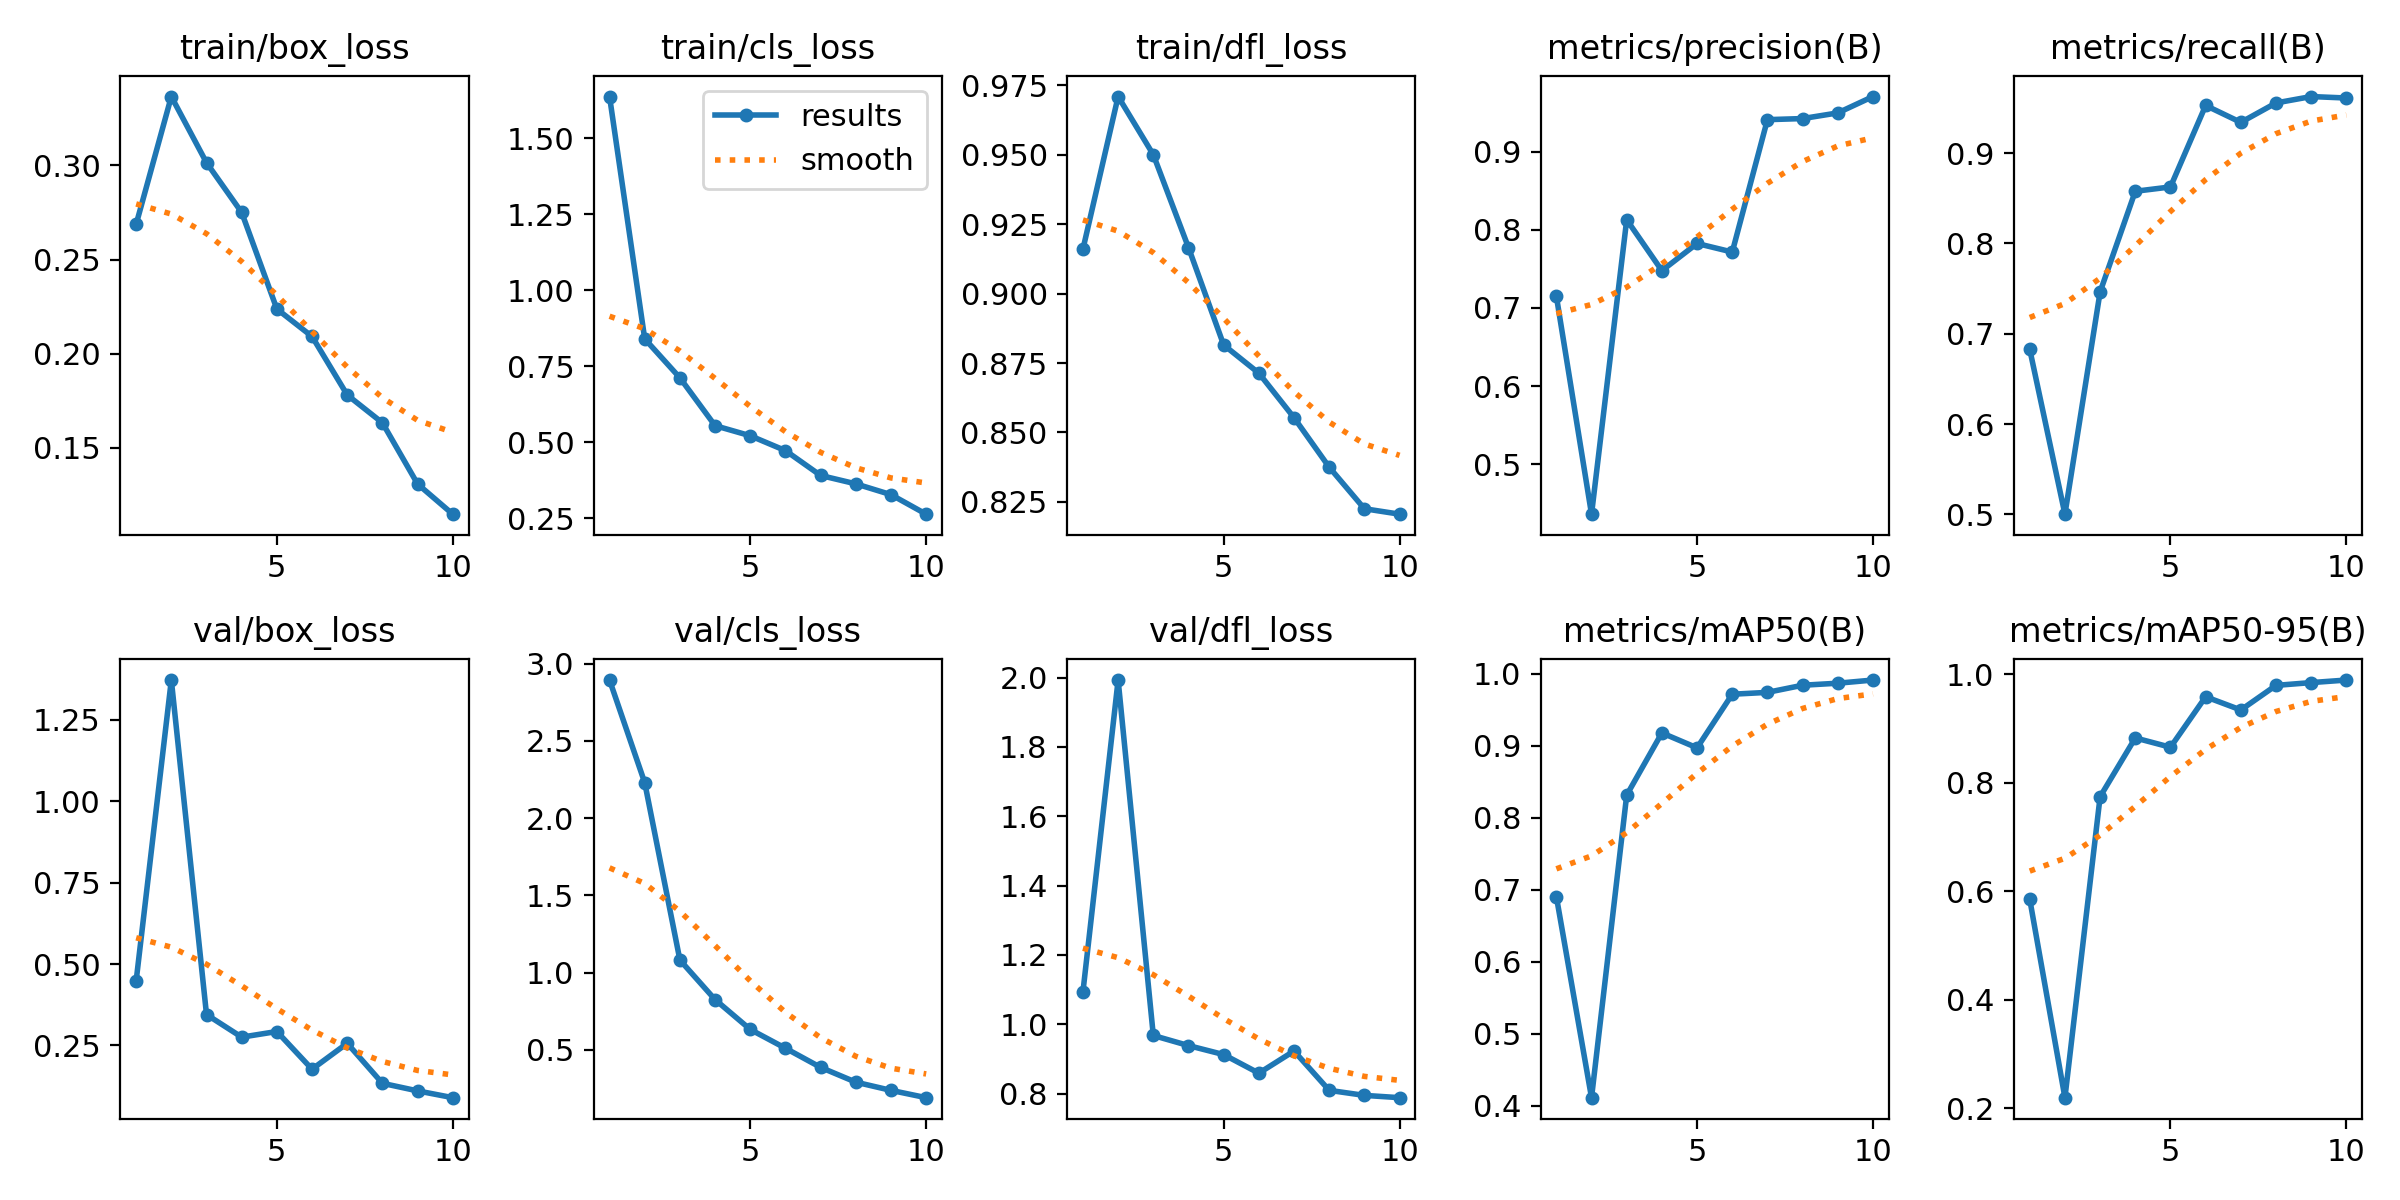

In [ ]:
Image(filename= f'/content/runs/detect/train/results.png' , width=600)

In [ ]:
!yolo task=detect mode = val model = /content/runs/detect/train/weights/best.pt data=/content/Orange_classification-2/data.yaml

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,841,497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Orange_classification-2/valid/labels.cache... 364 images, 0 backgrounds, 0 corrupt: 100% 364/364 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 23/23 [00:09<00:00,  2.36it/s]
                   all        364        364      0.971      0.961      0.991      0.989
       Healthy-Oranges        184        184      0.989      0.939      0.992      0.992
         Rotten-Orange        180        180      0.952      0.983       0.99      0.985
Speed: 0.6ms preprocess, 20.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
import glob
from IPython.display import Image, display
for imageName in glob.glob('/content/runs/detect/predict/*.jpg')[:3]:
  display(Image(filename=imageName,height=600))
  print("\n")

In [ ]:
!yolo task= detect mode=predict model=/content/runs/detect/train/weights/best.pt/